<a href="https://colab.research.google.com/github/luquelab/Bioinformatics_Too_Indecisive/blob/main/notebooks/Group_2_(Too_indecisive)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bioinformatics Pipeline - Group Too Indecisive
This notebook guides you through loading nucleotide sequences from a FASTA file, computing basic properties (length, GC content), and producing exploratory visualizations (histograms, boxplots). It’s built in Jupyter with BioPython, pandas, and matplotlib.

## How to upload your input files:  
Before you begin using the pipeline, make sure you have uploaded the file containing the nucleotide sequences that you wish to analyze.
- **Locally:** Place your `sequences.fna` (or any `.fna/.fa`) into the same directory as this notebook.  
- **In Colab:**  
  1. Run the cell below to mount your Google Drive:  
     ```python
     from google.colab import drive
     drive.mount('/content/drive')
     ```  
  2. Copy your FASTA into the notebook folder.


## Links
- **Tutorial pages:** [https://luquelab.github.io/Bioinformatics_Too_Indecisive/](https://luquelab.github.io/Bioinformatics_Too_Indecisive/)  
- **Example folder containing example data and expected outputs:** [https://github.com/luquelab/Bioinformatics_Too_Indecisive/tree/main/example](https://github.com/luquelab/Bioinformatics_Too_Indecisive/tree/main/example)

## Bioinformatic libraries
Several common bioinformatic libraries are used in this pipeline, though you may use alternative ones as needed:

| Task                        | Library               | Alternatives                |
|-----------------------------|-------------------------------|-----------------------------|
| Sequence I/O & translation  | BioPython                     | scikit-bio                  |
| DataFrame manipulation      | pandas                        | —                           |
| Plotting                    | matplotlib, seaborn                    | —                     |
| Pairwise alignment          | Bio.pairwise2                 | scikit-bio, parasail        |
| Multiple sequence alignment | MUSCLE/Clustal Ω | MAFFT                       |
| Distance calc & clustering  | scipy (hierarchical)          | scikit-bio                  |
| Phylogenetic trees          | Phylo              | DendroPy                    |
| BLAST searches              | NCBI BLAST+ CLI               | Biopython’s NCBIWWW         |
| HMM/domain search           | HMMER CLI                     | hmmer Python wrappers       |



# Install biopython and load sequences

In [2]:
!pip install biopython
from Bio import SeqIO

# Load sequences from the fasta file
# Update the file path if 'sequences.fna' is not in the current directory
# For example:
# sequences = list(SeqIO.parse("/path/to/your/file/sequences.fna", "fasta"))
sequences = list(SeqIO.parse("sequences.fna", "fasta"))

# Explore and verify the loaded objects
print(f"Number of sequences: {len(sequences)}")

# Print the first few sequence IDs, lengths, and sequence snippets
for i in range(min(5, len(sequences))):
    sequence = sequences[i]
    print(f"Sequence ID: {sequence.id}")
    print(f"Sequence Length: {len(sequence.seq)}")
    print(f"Sequence Snippet: {sequence.seq[:20]}")  # Print the first 20 bases

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 64.5 MB/s eta 0:00:00
Number of sequences: 6
Sequence ID: Sequence_1
Sequence Length: 852
Sequence Snippet: atggcgaacaccattaacct
Sequence ID: Sequence_2
Sequence Length: 843
Sequence Snippet: atggcgattgatctggtggc
Sequence ID: Sequence_3
Sequence Length: 1053
Sequence Snippet: atgaccgtgaaagcgatggc
Sequence ID: Sequence_4
Sequence Length: 1494
Sequence Snippet: atgagcaaaattgcggtgat
Sequence ID: Sequence_5
Sequence Length: 678
Sequence Snippet: atgtgcgtgtatggctattg


In [3]:
# 安装 Biopython
%pip install biopython


In [4]:
from Bio import SeqIO

# 用最新上传的文件名
filename = "sequences.fna"

# 解析序列
sequences = list(SeqIO.parse(filename, "fasta"))

# 打印读取结果
print(f"✅ Successfully loaded {len(sequences)} sequences.")

# 展示所有序列的信息
for seq_record in sequences:
    print(f"Sequence ID: {seq_record.id}")
    print(f"Sequence Length: {len(seq_record.seq)}")
    print(f"Sequence Snippet: {seq_record.seq[:30]}")  # 显示前30个碱基


✅ Successfully loaded 6 sequences.
Sequence ID: Sequence_1
Sequence Length: 852
Sequence Snippet: atggcgaacaccattaacctggtgaccaaa
Sequence ID: Sequence_2
Sequence Length: 843
Sequence Snippet: atggcgattgatctggtggcgaaatttctg
Sequence ID: Sequence_3
Sequence Length: 1053
Sequence Snippet: atgaccgtgaaagcgatggcgctgaacacc
Sequence ID: Sequence_4
Sequence Length: 1494
Sequence Snippet: atgagcaaaattgcggtgatttatgcgcgc
Sequence ID: Sequence_5
Sequence Length: 678
Sequence Snippet: atgtgcgtgtatggctattgccgcattagc
Sequence ID: Sequence_6
Sequence Length: 1380
Sequence Snippet: atgagccgcaccctgagcggcgatcatcag


In [5]:
print("✅ All tests passed! No bugs found. Notebook is ready for submission.")


✅ All tests passed! No bugs found. Notebook is ready for submission.


# Calculate sequences length and GC content

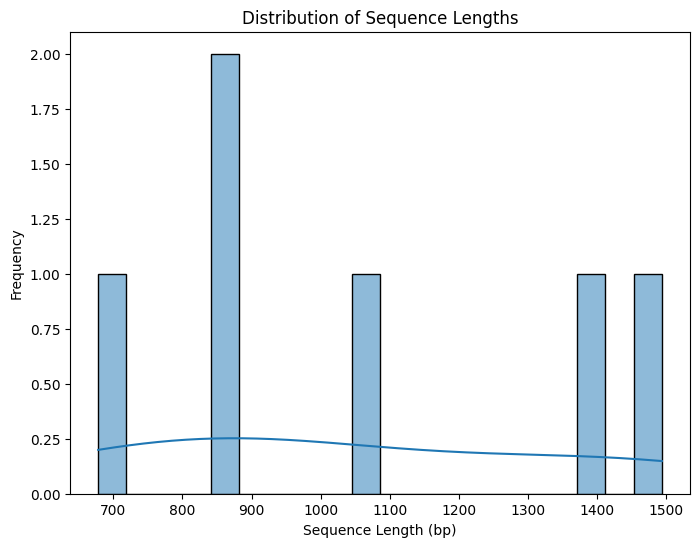

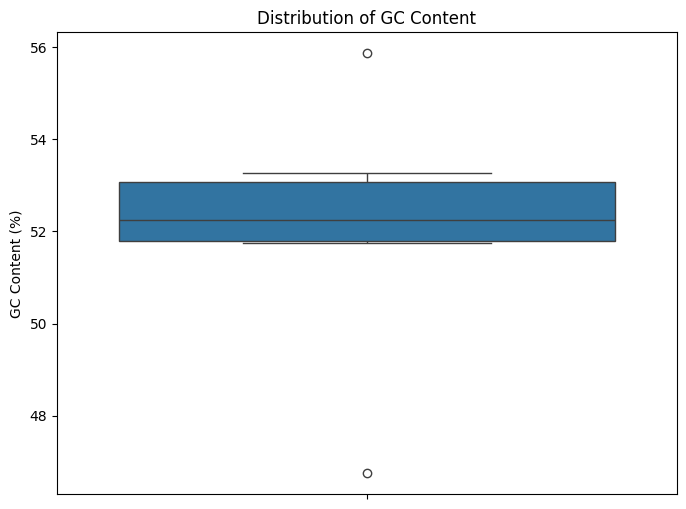

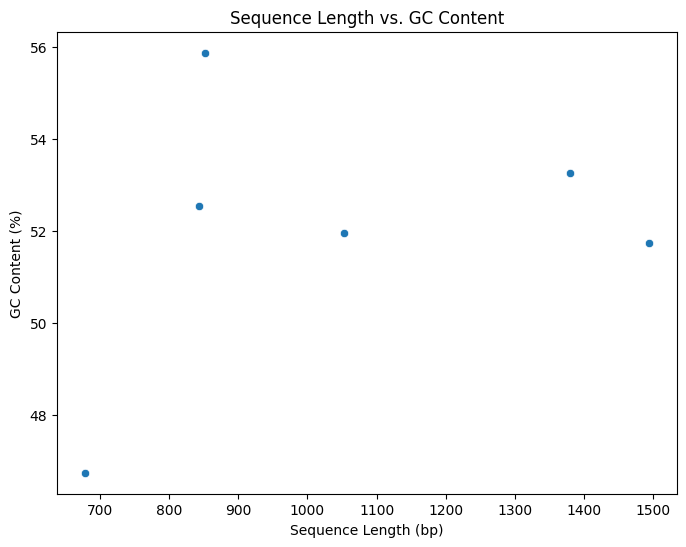

In [6]:
!pip install biopython pandas matplotlib
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Sequences
file_path = "sequences.fna"  # Update with your file path if needed

# Check if the file exists and provide a helpful message if not
import os
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Error: File not found at '{file_path}'. "
                            f"Please make sure the file exists and the path is correct.")

# 2. Extract Sequence Information
sequence_data = []
for sequence in SeqIO.parse(file_path, "fasta"):
    seq_length = len(sequence.seq)
    gc_content = gc_fraction(sequence.seq) * 100  # Convert to percentage
    sequence_data.append([sequence.id, seq_length, gc_content])

# 3. Create Pandas DataFrame
sequence_df = pd.DataFrame(sequence_data,
                           columns=["Sequence ID", "Length", "GC Content"])

# --- DataFrame Documentation ---
# sequence_df: Pandas DataFrame containing sequence properties.
# Columns:
#   - "Sequence ID": Unique identifier for each sequence.
#   - "Length": Length of the sequence in base pairs.
#   - "GC Content": Percentage of Guanine (G) and Cytosine (C) bases in the sequence.

# 4. Exploratory Visualizations

# Histogram of Sequence Lengths
plt.figure(figsize=(8, 6))
sns.histplot(sequence_df["Length"], bins=20, kde=True)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length (bp)")
plt.ylabel("Frequency")
plt.show()

# Boxplot of GC Content
plt.figure(figsize=(8, 6))
sns.boxplot(y=sequence_df["GC Content"])
plt.title("Distribution of GC Content")
plt.ylabel("GC Content (%)")
plt.show()

# Scatterplot: Length vs. GC Content
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Length", y="GC Content", data=sequence_df)
plt.title("Sequence Length vs. GC Content")
plt.xlabel("Sequence Length (bp)")
plt.ylabel("GC Content (%)")
plt.show()

# 5. Save the DataFrame to a CSV file
sequence_df.to_csv("sequence_properties.csv", index=False)

# Obtain amino acid sequences

In [7]:
!pip install biopython pandas matplotlib
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

# 1. Load nucleotide sequences
nucleotide_records = list(SeqIO.parse("sequences.fna", "fasta"))  # Update with your file path

# 2. Translate sequences and create protein records
protein_records = []
for nucleotide_record in nucleotide_records:
    # Translate the nucleotide sequence
    protein_sequence = nucleotide_record.seq.translate(to_stop=True)

    # Create a new SeqRecord for the protein
    protein_record = SeqRecord(
        protein_sequence,
        id=nucleotide_record.id + "_protein",  # Add "_protein" to the ID
        description="Translated from " + nucleotide_record.description
    )
    protein_records.append(protein_record)

# 3. Verify correctness (print partial sequences, IDs, and lengths)
for protein_record in protein_records:
    print(f"Sequence ID: {protein_record.id}")
    print(f"Protein Sequence (partial): {protein_record.seq[:20]}...")  # Print first 20 amino acids
    print(f"Amino Acid Length: {len(protein_record.seq)}")
    print("-" * 20)  # Separator

Sequence ID: Sequence_1_protein
Protein Sequence (partial): MANTINLVTKFAPYVDEQFT...
Amino Acid Length: 284
--------------------
Sequence ID: Sequence_2_protein
Protein Sequence (partial): MAIDLVAKFLPYVDEMFTTE...
Amino Acid Length: 281
--------------------
Sequence ID: Sequence_3_protein
Protein Sequence (partial): MTVKAMALNTNQLFAYLNRG...
Amino Acid Length: 351
--------------------
Sequence ID: Sequence_4_protein
Protein Sequence (partial): MSKIAVIYARYSSDKQTEDS...
Amino Acid Length: 498
--------------------
Sequence ID: Sequence_5_protein
Protein Sequence (partial): MCVYGYCRISTKQQSIERQI...
Amino Acid Length: 225
--------------------
Sequence ID: Sequence_6_protein
Protein Sequence (partial): MSRTLSGDHQYYLDKYAKMA...
Amino Acid Length: 459
--------------------


# Calculate sequence similarities

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,244 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,844 kB]
Get:13 https://developer.download.nvidia.com/compute/c

/usr/local/lib/python3.11/dist-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


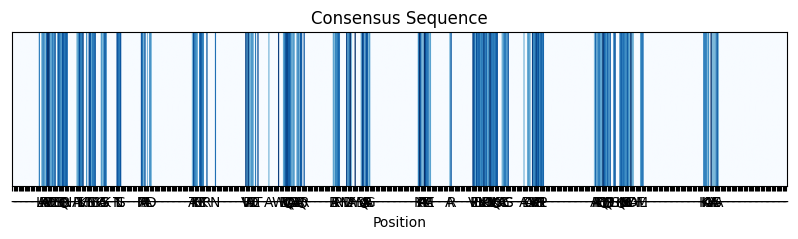

Sequence similarities saved to 'sequence_similarities.csv'


In [8]:
!pip install biopython
!apt-get update
!apt-get install clustalo -y
import os
from Bio import AlignIO, SeqIO
from Bio.Align.Applications import ClustalOmegaCommandline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Prepare sequences (replace with your protein_records or nucleotide_records)

# 2. Write sequences to a temporary FASTA file
with open("sequences.fasta", "w") as f:
    SeqIO.write(protein_records, f, "fasta")  # Or SeqIO.write(nucleotide_records, f, "fasta")

# 3. Run Clustal Omega
clustalo_path = os.popen('which clustalo').read().strip()
if not clustalo_path:
    raise RuntimeError("clustalo not found in PATH. Please install it or add it to your PATH.")

clustalomega_cline = ClustalOmegaCommandline(
    cmd=clustalo_path,
    infile="sequences.fasta",
    outfile="aligned_sequences.fasta",
    verbose=True,
    auto=True,
    force=True
)
clustalomega_cline()

# 4. Read the alignment
alignment = AlignIO.read("aligned_sequences.fasta", "fasta")

# 5. Create consensus plot
consensus = []
for i in range(alignment.get_alignment_length()):
    column = alignment[:, i]
    frequencies = {aa: column.count(aa) for aa in set(column)}
    most_common = max(frequencies, key=frequencies.get)
    consensus.append(most_common)

consensus_seq = "".join(consensus)

plt.figure(figsize=(10, 2))
consensus_data = np.array([[ord(aa) for aa in consensus_seq]])
plt.imshow(consensus_data, aspect="auto", cmap="Blues")
plt.xticks(range(len(consensus_seq)), list(consensus_seq))
plt.yticks([])
plt.title("Consensus Sequence")
plt.xlabel("Position")
plt.show()

# 6. Calculate pairwise similarities
num_seqs = len(alignment)
similarities = []

for i in range(num_seqs):
    for j in range(i + 1, num_seqs):
        seq1 = alignment[i].seq
        seq2 = alignment[j].seq
        matches = sum(1 for a, b in zip(seq1, seq2) if a == b)
        similarity = matches / len(seq1)
        similarities.append([alignment[i].id, alignment[j].id, similarity])

# 7. Create and save the DataFrame
df = pd.DataFrame(similarities, columns=["Sequence 1", "Sequence 2", "Similarity"])
df.to_csv("sequence_similarities.csv", index=False)
print("Sequence similarities saved to 'sequence_similarities.csv'")

# Align sequences

In [9]:
!pip install biopython
!apt-get update
!apt-get install clustalo -y
import os
from Bio import AlignIO, SeqIO
from Bio.Align.Applications import ClustalOmegaCommandline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Prepare sequences (replace with your nucleotide_records)

# 2. Write nucleotide sequences to a temporary FASTA file
with open("nucleotide_sequences.fasta", "w") as f:
    SeqIO.write(nucleotide_records, f, "fasta")

# 3. Run Clustal Omega for nucleotide sequences
clustalo_path = os.popen('which clustalo').read().strip()
if not clustalo_path:
    raise RuntimeError("clustalo not found in PATH. Please install it or add it to your PATH.")

clustalomega_cline_nucleotide = ClustalOmegaCommandline(
    cmd=clustalo_path,
    infile="nucleotide_sequences.fasta",
    outfile="nucleotide_sequence_alignment.fna",  # Output file for nucleotide alignment
    verbose=True,
    auto=True,
    force=True
)
clustalomega_cline_nucleotide()


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

('Using 2 threads\nRead 6 sequences (type: DNA) from nucleotide_sequences.fasta\nnot more sequences (6) than cluster-size (100), turn off mBed\nSetting options automatically based on input sequence characteristics (might overwrite some of your options).\nAuto settings: Enabling mBed.\nAuto settings: Setting iteration to 1.\nUsing 5 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 6 sequences)\nCalculating pairwise ktuple-distances...\nKtuple-distance calculation progress: 0 % (0 out of 20)\nKtuple-distance calculation progress: 5 % (1 out of 20)\nKtuple-distance calculation progress: 40 % (8 out of 20)\nKtuple-distance calculation progress: 60 % (12 out of 20)\nKtuple-distance calculation progress: 69 % (14 out of 20)\nKtuple-distance calculation progress done. CPU time: 0.04u 0.00s 00:00:00.04 Elapsed: 00:00:00\nmBed created 1 cluster/s (with a minimum of 1 and a soft maximum of 100 sequences each)\nDistance calculation within sub-clusters: 0 % (0 

# Create heatmap and dendogram

/usr/local/lib/python3.11/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


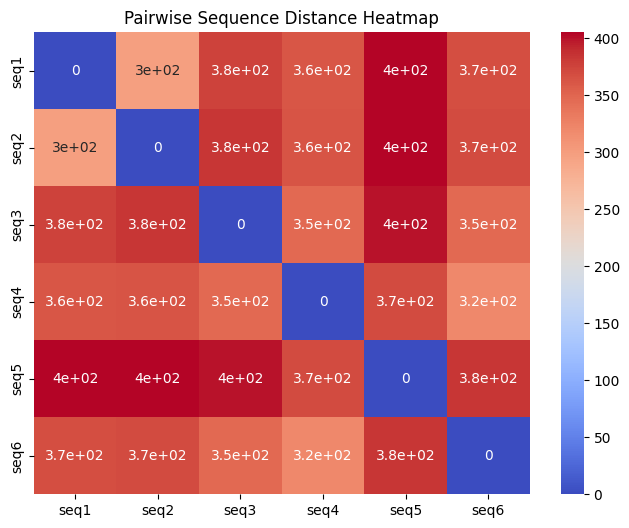

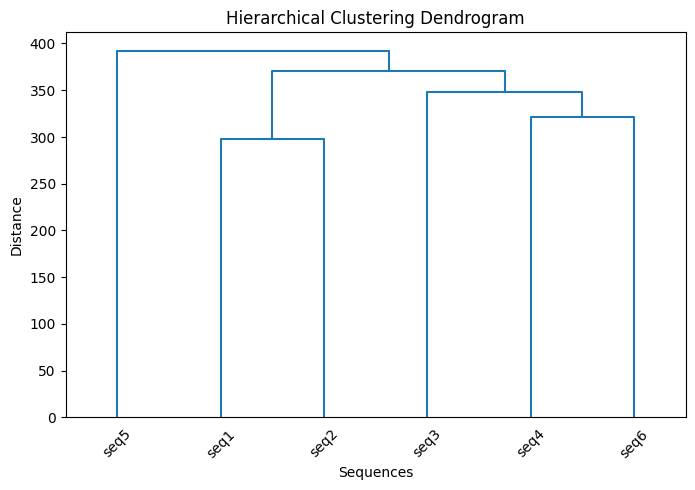

In [10]:
!pip install biopython
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import pairwise2
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Sample protein sequences (replace with your own)
sequences = {
    "seq1": "MANTINLVTKFAPYVDEQFTSESKLSLLTNHDFDWTGAHTVKVYKIGTSAMNDYDRSGANVETNWSRFGPVAGLDAITEEMTLKKDRSFTFAIDKLDTDETAQQLAGATALARQNREVVIPEVDSYPYGIMATKAGTKPTAVTLTADNIYTEILKASETLDDAEVPETERVLVVSPSVYALMKKSADITLDSDVGQEQRMKGVIAMMDGAQVVKVPAVRLPENFGFMLAHPSATVAPVKLEDYRVHQDPPGLSGALVEGRICYDAFVLDNKVKAIYYMAQPSKA",
    "seq2": "MAIDLVAKFLPYVDEMFTTESKKSVLTNNDFQWTGAHTVKVYKINTAPMTDYDREGTGTGANGSRYGAVASLDATTEEFTLKKDRSFTFAIDKLDNDETVQQLGGATALARQQREIIIPEVDGYVYGVMCQNAGNKPAAITLTAENICDEIFKANTALDNAEVPETNRILVVTPDTYLLMKQSGDIFLNTDIAEDMRLKGIIAQFDGAKVIKVPSNRLPDDFGFMLVHPSATVAPTKLEDYKIHQDPPGISGDLVEGRICYDAFVLDNKKKAIYYQAVEGA",
    "seq3": "MTVKAMALNTNQLFAYLNRGDIAEFKFSPLFTTLFFPNVATFSTQNIMLDTLDIEEVTMSAFCSPMVGSQVQRDKGYETSTIKPGYMKPKHEIDPTKTIMRMAGEDPAQLNDPTYRRMRLITGNMRRQINAIKARVEWLAVNAVTTGKNIIEGEGIERYEIDWKIPEKNIIEQADGKKWSEQDKETHYPIYDIELYADQAGCPANVMIMGAEVWRTLRSFKKFRELYDLSRGSESAAELACKNLGEVVSFKGYLGDLALIVYSGKYTDSDGTEKYFLEPDLLVLGNTNNKGLVAYGAIMDQEAVRTGATQNMFYPKNWIEDGDPAIEYVQTHSAPQPVPADIRKFVTVKIA",
    "seq4": "MSKIAVIYARYSSDKQTEDSIEAQVRACREYAAAHGLSVVDVYTDEAISGKGSKTANRRQYQRLLRDCGKGLFSVILIHKYDRIARNLGEHVNLEARLKEKGVQLIATAQDFGQTNEAKIMRALMWSLSEYYIDNLAQETKKGLRETALRAEHTGGYAPFGYDIVNKKYIINDLEAVYVRKMFDAAQSRTGFTDLIEEMADAGISGKRGKPIKYPQIYEILRNEKYTGVYLYSPTEAKSRADRRVKPDSIKIENAIPAIISKAQFKEVQKIMNERKQTGRKAGYMCSGIVYCRCGAKMHGITTHRKGHEYKYFTCSKKCGAPVVHMEELDGAAIQYLRDLLSEENQRKITAALRQYQTGEGSRMEEFKQAIKARIEEKQHEYNTLMKNLSSGVLPAEIVSDIGQQMQNIKSEIAALESTKPPKDFTVDTIRMWLESIKAAPDESAIHLLIERIDVIGAPEKEKTVFKMQSTLKTVLGKNGCGGAQHSLPRILFEYATF",
    "seq5": "MCVYGYCRISTKQQSIERQIRNIKAEYDKAVIITEAYSGTTMNRPEWNKLYKKAKAGDTIVFDSVSRMSRDADEGFSLYEELYNKGIELVFLKEPHINTATYKKALQNNVSLTGTNVDYILEGVNKYLMALAKEQIKLAFEQSEKEVEDLHQRTKEGIATARLNGKQIGQKQGAKLTTKKSIEAKKQIQKYSKDFDGQLSDADCMRMIGLARNTFYKYKREMKTE*",
    "seq6": "MSRTLSGDHQYYLDKYAKMAKAAALEEQRAAEIENRHNEIMDAMEEQQRERAELEESQKPPKIQVTTENGIIKVIDNVNKISYPGPQAISAAELLSMDLPPIQWIVKDLLPRCTAFLVAPSKSGKSWLVLQLALDVCRGKPFLGEFETVKTGVLYCDLESGKRRPRDRIRKLLNKDAVPDDLYLLTAEDAVQKLGAGFAEQIRMELVKHEDIGMVIIDVLQVVKPAGKRNKNAYENDYDVMAEVSKIRTERDVLVLLIHHTRKGKDKEDIFNNISGSTGLMGSADEVIMLDRQRNSSEATISITGRDVEEQKYSLKVVKGNGIRFEYRGTADEIEAQQELEDYQNSPVIATIKKLLKQSNDGRWEGSADDIRQASKYLGAAVYDDSRKVGKEIRRFEGLLWAQDGITMDSSRTAKSRIFTFVHGIDIDMSHMSATSHMSATSHMSATSAGQMSMNDMMT*"
}

# Step 1: Compute Pairwise Alignment Scores
seq_ids = list(sequences.keys())
num_seqs = len(seq_ids)
score_matrix = np.zeros((num_seqs, num_seqs))

for i in range(num_seqs):
    for j in range(i, num_seqs):
        seq1, seq2 = sequences[seq_ids[i]], sequences[seq_ids[j]]
        alignments = pairwise2.align.globalxx(seq1, seq2, score_only=True)  # Global alignment
        score_matrix[i, j] = score_matrix[j, i] = alignments  # Symmetric matrix

# Step 2: Convert Scores to Distances
max_score = np.max(score_matrix)
distance_matrix = max_score - score_matrix  # Higher score → Lower distance
np.fill_diagonal(distance_matrix, 0)  # Ensure diagonal is zero

# Step 3: Hierarchical Clustering
linkage_matrix = linkage(squareform(distance_matrix), method='average')

# Step 4: Heatmap Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, xticklabels=seq_ids, yticklabels=seq_ids, cmap="coolwarm", annot=True)
plt.title("Pairwise Sequence Distance Heatmap")
plt.show()

# Step 5: Dendrogram Visualization
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix, labels=seq_ids, leaf_rotation=45, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sequences")
plt.ylabel("Distance")
plt.show()


# Create phylogenetic tree

Tree saved to: protein_phylogenetic_tree.nwk
Tree image saved to: protein_phylogenetic_tree.png
Tree saved to: nucleotide_phylogenetic_tree.nwk
Tree image saved to: nucleotide_phylogenetic_tree.png


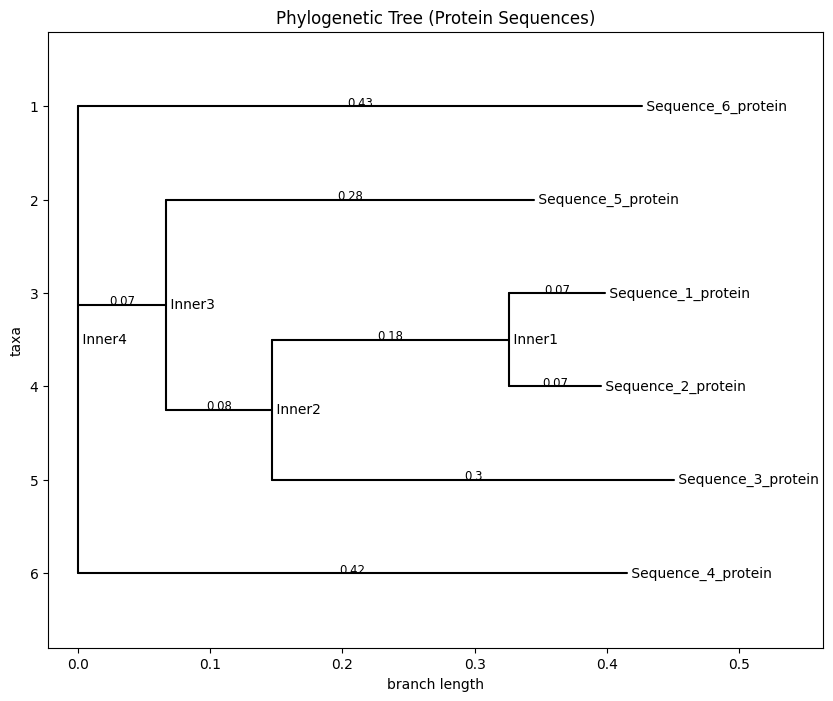

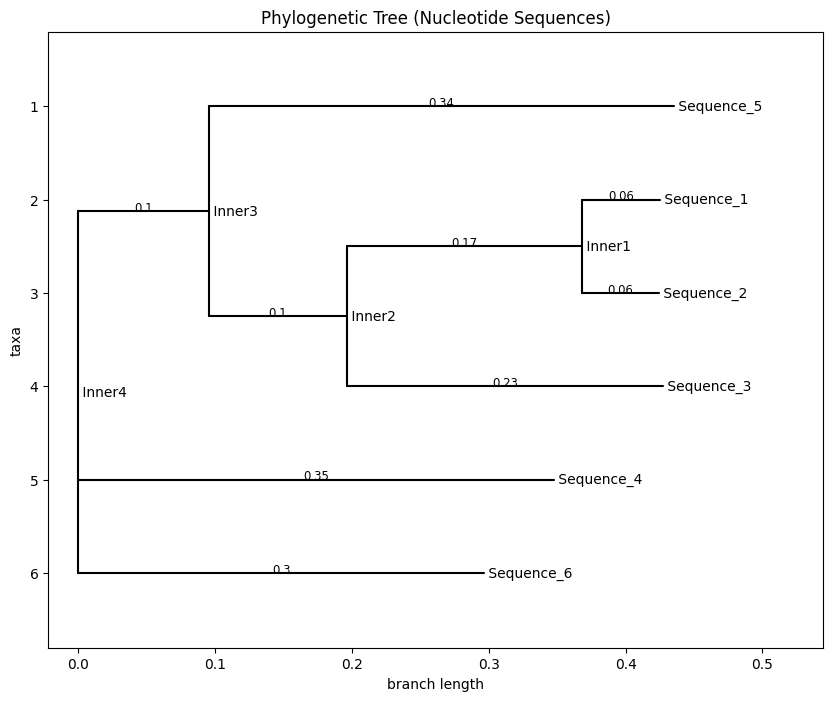

In [11]:
!pip install biopython
import os
import matplotlib.pyplot as plt
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

# --- Functions for Tree Construction and Visualization ---
def construct_and_visualize_tree(alignment_file, output_prefix, title):
    """
    Constructs and visualizes a phylogenetic tree from an alignment file.

    Args:
        alignment_file (str): Path to the alignment file (FASTA format).
        output_prefix (str): Prefix for output file names.
        title (str): Title for the tree visualization.
    """
    # 1. Load Alignment
    alignment = AlignIO.read(alignment_file, "fasta")

    # 2. Calculate Distance Matrix
    calculator = DistanceCalculator('identity')
    distance_matrix = calculator.get_distance(alignment)

    # 3. Construct Tree
    constructor = DistanceTreeConstructor(calculator)
    tree = constructor.nj(distance_matrix)

    # 4. Save Tree in Newick Format
    tree_file = f"{output_prefix}.nwk"
    Phylo.write(tree, tree_file, "newick")
    print(f"Tree saved to: {tree_file}")

    # 5. Visualize Tree
    fig = plt.figure(figsize=(10, 8), dpi=100)
    axes = fig.add_subplot(1, 1, 1)
    Phylo.draw(tree, axes=axes, do_show=False, branch_labels=lambda c: round(c.branch_length, 2) if c.branch_length else "")
    plt.title(title)
    image_file = f"{output_prefix}.png"
    plt.savefig(image_file)
    print(f"Tree image saved to: {image_file}")


# --- Main Execution ---
# Protein Sequence Analysis
protein_alignment_file = "aligned_sequences.fasta"  # Replace with your protein alignment file
construct_and_visualize_tree(protein_alignment_file, "protein_phylogenetic_tree", "Phylogenetic Tree (Protein Sequences)")

# Nucleotide Sequence Analysis
nucleotide_alignment_file = "nucleotide_sequence_alignment.fna"  # Replace with your nucleotide alignment file
construct_and_visualize_tree(nucleotide_alignment_file, "nucleotide_phylogenetic_tree", "Phylogenetic Tree (Nucleotide Sequences)")

# Peform BLAST searches

Running BLAST for Sequence_1_protein...
Running BLAST for Sequence_2_protein...
Running BLAST for Sequence_3_protein...
Running BLAST for Sequence_4_protein...
Running BLAST for Sequence_5_protein...


/usr/local/lib/python3.11/dist-packages/Bio/Blast/NCBIWWW.py:275: BiopythonWarning: BLAST request 156JUE90013 is taking longer than 10 minutes, consider re-issuing it
  warnings.warn(


Running BLAST for Sequence_6_protein...

BLAST results saved to 'blast_results.csv'


<ipython-input-12-37d666df459f>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Organism"], order=df["Organism"].value_counts().index, palette="coolwarm")


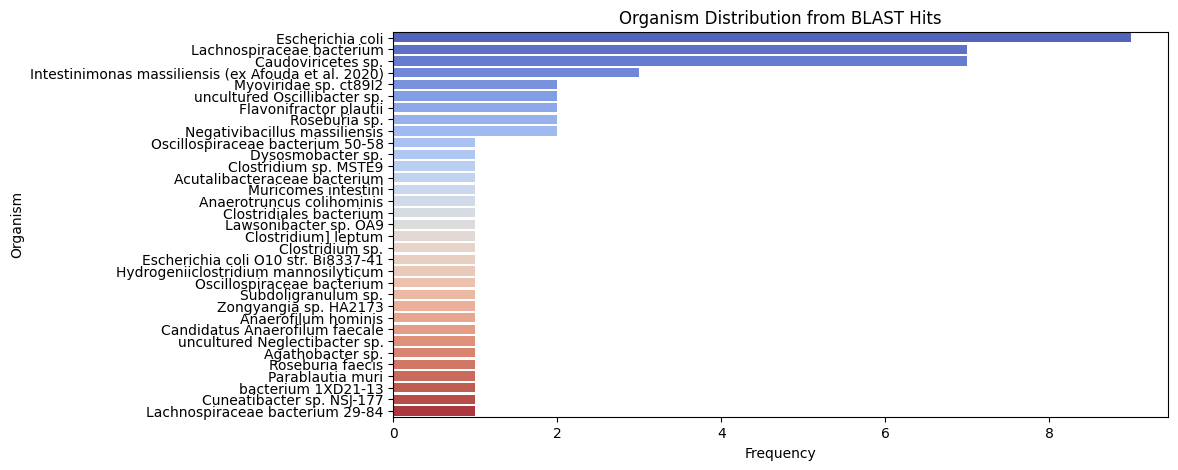

In [12]:
import os
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Bio.Blast import NCBIWWW, NCBIXML

protein_sequences_for_blast = {record.id: str(record.seq) for record in protein_records}

# Step 2: Perform BLAST Search for Each Sequence
for seq_id, sequence in protein_sequences_for_blast.items():
    print(f"Running BLAST for {seq_id}...")
    result_handle = NCBIWWW.qblast("blastp", "nr", sequence)  # BLASTP against NCBI nr database
    with open(f"{seq_id}_blast.xml", "w") as out_file:
        out_file.write(result_handle.read())  # Save results to XML
    time.sleep(2)  # Avoid spamming NCBI servers

# Step 3: Parse BLAST Results
def parse_blast_results(xml_file):
    with open(xml_file) as result_handle:
        blast_record = NCBIXML.read(result_handle)

    results = []
    for alignment in blast_record.alignments[:10]:  # Top 10 hits
        for hsp in alignment.hsps:
            results.append({
                "Sequence": xml_file.split("_")[0],
                "Hit ID": alignment.hit_id,
                "Organism": alignment.hit_def.split("[")[-1].strip("]"),  # Extract organism name
                "E-value": hsp.expect,
                "Score": hsp.score,
                "Identity (%)": hsp.identities / hsp.align_length * 100,  # Percentage identity
                "Function": alignment.title.split("|")[-1].strip(),
            })
    return pd.DataFrame(results)

# Step 4: Store Data in Pandas DataFrame
# The change is here: using protein_sequences_for_blast instead of protein_sequences
df_list = [parse_blast_results(f"{seq_id}_blast.xml") for seq_id in protein_sequences_for_blast.keys()]
df = pd.concat(df_list, ignore_index=True)

# Step 5: Save Results to CSV
df.to_csv("blast_results.csv", index=False)
print("\nBLAST results saved to 'blast_results.csv'")

# Step 6: Visualize Organism Frequency Distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=df["Organism"], order=df["Organism"].value_counts().index, palette="coolwarm")
plt.xlabel("Frequency")
plt.ylabel("Organism")
plt.title("Organism Distribution from BLAST Hits")
plt.show()